<a href="https://colab.research.google.com/github/gutiel2/Machine-Learning-Engineering/blob/main/gutiel2_ML_ICA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Index(['x', ' y'], dtype='object')


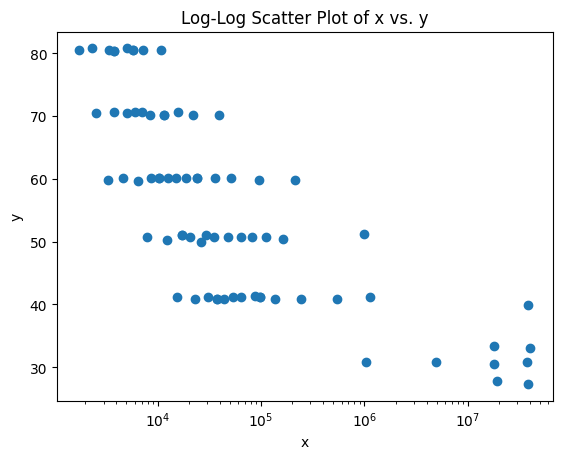

In [34]:
Mateo Gutierrez
RIN: 662006635
ML - ICA 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
skmodel = KNeighborsClassifier(n_neighbors=3)

drive.mount('/content/drive', force_remount=True)
file = 'mlica2.csv'
file_path = '/content/drive/My Drive/ColabNotebooks/HyperData/' + file

df = pd.read_csv(file_path)

print(df.columns)
df.columns = ['x', 'y']
df.head()

plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Log-Log Scatter Plot of x vs. y')

# Set both axes to logarithmic scale
plt.xscale('log')

plt.show()

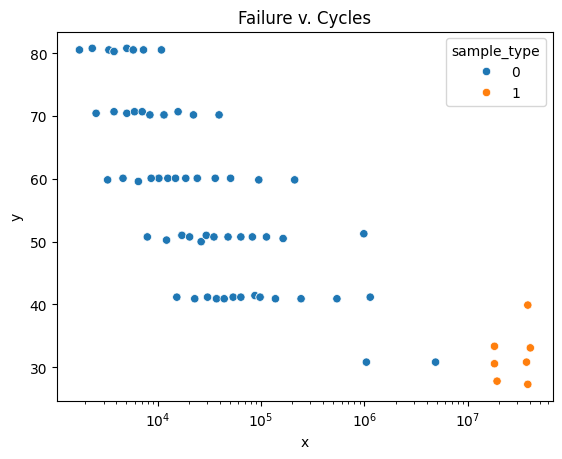

In [37]:
df['sample_type'] = 0
df.loc[df['x'] > 1e7, 'sample_type'] = 1

sns.scatterplot(data=df, x='x', y='y', hue='sample_type')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Failure v. Cycles')
plt.show()

0.972972972972973


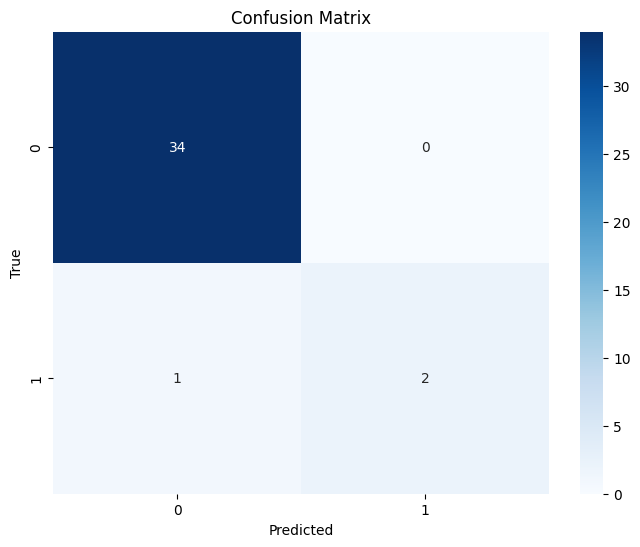

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['x', 'y']].to_numpy()
y = df['sample_type'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

KNN = KNeighborsClassifier(n_neighbors= 3, p=2)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()